In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [7]:
df =  pd.read_csv("../../Data/DR3/espectros_normalizados_balanceados_SNG_1.csv")

In [8]:
df =  df.rename(columns={'col344': "id"})

In [10]:
df.dtypes

col1      float64
col2      float64
col3      float64
col4      float64
col5      float64
           ...   
col340    float64
col341    float64
col342    float64
col343    float64
id          int64
Length: 344, dtype: object

In [11]:
# separar las características (X) y la etiqueta (y)
X = df.drop('id', axis=1)
y = df['id']

In [12]:
# codificar la etiqueta (y)
encoder = LabelEncoder()
y = encoder.fit_transform(y)


In [13]:

# dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [37]:
# crear el modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(3, activation='softmax')
])

# compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [38]:
# entrenar el modelo
history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/60
76/76 [==============================] - 1s 6ms/step - loss: 0.7136 - accuracy: 0.7131 - val_loss: 0.5148 - val_accuracy: 0.8023
Epoch 2/60
76/76 [==============================] - 0s 5ms/step - loss: 0.5436 - accuracy: 0.8013 - val_loss: 0.4572 - val_accuracy: 0.8320
Epoch 3/60
76/76 [==============================] - 0s 5ms/step - loss: 0.4824 - accuracy: 0.8244 - val_loss: 0.4007 - val_accuracy: 0.8633
Epoch 4/60
76/76 [==============================] - 0s 4ms/step - loss: 0.4408 - accuracy: 0.8397 - val_loss: 0.3557 - val_accuracy: 0.8699
Epoch 5/60
76/76 [==============================] - 0s 4ms/step - loss: 0.4161 - accuracy: 0.8603 - val_loss: 0.3500 - val_accuracy: 0.8863
Epoch 6/60
76/76 [==============================] - 0s 4ms/step - loss: 0.3790 - accuracy: 0.8755 - val_loss: 0.2980 - val_accuracy: 0.9094
Epoch 7/60
76/76 [==============================] - 0s 4ms/step - loss: 0.3747 - accuracy: 0.8714 - val_loss: 0.4448 - val_accuracy: 0.8353
Epoch 8/60
76/76 [==

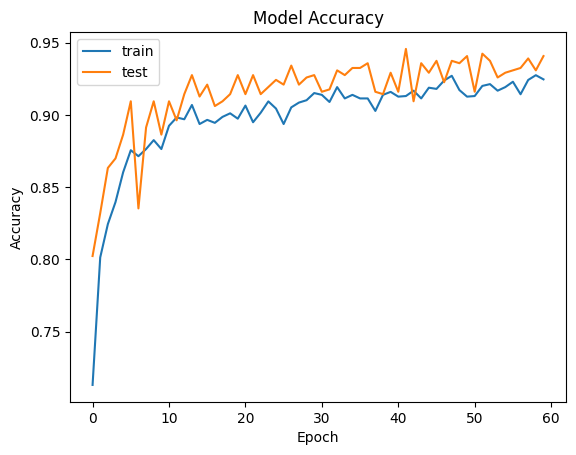

In [39]:
# graficar la precisión de entrenamiento y prueba
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [40]:
y=df['id']
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(y)
encoder = LabelEncoder()
df['codificado'] = encoder.fit_transform(df['id'])

nombres_etiquetas = encoder.classes_
nuevos_nombres = ['Symbiotics', 'Planetary Nebulae', 'Red Giants']
nombres_etiquetas_dict = {nombres_etiquetas[i]: nuevos_nombres[i] for i in range(len(nombres_etiquetas))}
df['nombres_etiquetas'] = df['id'].map(nombres_etiquetas_dict)

df_agrupado = df.groupby('nombres_etiquetas')['codificado'].mean()
print(df_agrupado)

nombres_etiquetas
Planetary Nebulae    1.0
Red Giants           2.0
Symbiotics           0.0
Name: codificado, dtype: float64


In [41]:
# predecir las probabilidades para los datos de prueba
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

19/19 [==============================] - 0s 1ms/step
[[190   3   6]
 [ 12 177  14]
 [  0   1 204]]


In [42]:
report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9406    0.9548    0.9476       199
           1     0.9779    0.8719    0.9219       203
           2     0.9107    0.9951    0.9510       205

    accuracy                         0.9407       607
   macro avg     0.9431    0.9406    0.9402       607
weighted avg     0.9430    0.9407    0.9402       607



In [43]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9406919275123559


In [44]:
print("size of the splits")
print("X_train: ",  X_train.shape)
print("X_test: ",  X_test.shape)
print("y_test: ",  y_test.size)
print("y_pred: ",  y_pred.size)

size of the splits
X_train:  (2426, 343)
X_test:  (607, 343)
y_test:  607
y_pred:  607
